# Python Project - NLP Detect Fed speech sentiment

###### Attempt to replicate on Norwegian data with US example

######  
"""
Created on Thu Feb  7 12:04:23 2019

@author: nitinsinghal
"""
##### Bird, Steven, Edward Loper and Ewan Klein (2009), Natural Language Processing with Python. O’Reilly Media Inc.

### Import of file and packages

In [28]:
import nltk
import numpy as np
from nltk.stem import WordNetLemmatizer
from nltk.classify import NaiveBayesClassifier, DecisionTreeClassifier
import pandas as pd
import matplotlib.pyplot as plt


In [9]:
# Importing the Data file from ECB, Change path

df = pd.read_csv(r'C:\Users\wm934\Downloads\Labdocs\all_ECB_speeches.csv', sep = "|")
df.tail(2)

,date,speakers,title,subtitle,contents
2650,1997-03-10,Alexandre Lamfalussy,Securing the benefits of EMU,"Address by Alexandre Lamfalussy, President of ...",Securing the benefits of EMU Address by Al...
2651,1997-02-07,Alexandre Lamfalussy,Conference organised by the Hungarian Banking ...,"Address by Alexandre Lamfalussy, President of ...",Conference organised by the Hungarian Bankin...


In [10]:
df['date']=pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2652 entries, 0 to 2651
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      2652 non-null   datetime64[ns]
 1   speakers  2649 non-null   object        
 2   title     2652 non-null   object        
 3   subtitle  2651 non-null   object        
 4   contents  2596 non-null   object        
dtypes: datetime64[ns](1), object(4)
memory usage: 103.7+ KB


In [18]:
# Sentiment Analysis of FOMC statement using NLP NLTK
# Using tokenization, word count, sentence importance, must import stopwords text first

from builtins import range
import nltk
import numpy as np
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
stopwords = set(w.rstrip() for w in open(r'C:\Users\wm934\Downloads\Labdocs\stopwords.txt'))
# add more stopwords to remove from the text
stopwords = ({'federal', 'fund', 'staff', 'reported', 'committee', 'discussed', 'desk', 'dealer', 
                            'meeting', 'agency', 'mortgage-backed', 'security', 'minute', 'board', 'forecaster', 
                            'governor', 'president', 'mexican', 'north', 'technology', 'example', 'addendum', 
                            'corporation', 'interbank', 'technological', 'requirement', 'seasonality'})


### Exploratory Data Analysis 

In [19]:
df.head(4)

,date,speakers,title,subtitle,contents
0,2022-12-08,Christine Lagarde,Macroprudential policy in Europe: building res...,"Welcome remarks by Christine Lagarde, Presiden...",SPEECH Macroprudential policy in Europe: bu...
1,2022-12-07,Fabio Panetta,Crypto dominos: the bursting crypto bubbles an...,"Keynote speech by Fabio Panetta, Member of the...",SPEECH Crypto dominos: the bursting crypto ...
2,2022-12-07,Philip R. Lane,ECB monetary policy,"Presentation by Philip R. Lane, Member of the ...",NaN
3,2022-12-01,Frank Elderson,The European Climate Law and the European Cent...,"Keynote speech by Frank Elderson, Member of th...",SPEECH The European Climate Law and the Eu...


In [20]:
df['speakers'].describe()

count                    2649
unique                     27
top       Jean-Claude Trichet
freq                      329
Name: speakers, dtype: object

In [35]:
df['lengthofspeech'] = df['contents'].str.count(' ') + 1
df

,date,speakers,title,subtitle,contents,lengthofspeech
2651,1997-02-07,Alexandre Lamfalussy,Conference organised by the Hungarian Banking ...,"Address by Alexandre Lamfalussy, President of ...",Conference organised by the Hungarian Bankin...,3760.0
2650,1997-03-10,Alexandre Lamfalussy,Securing the benefits of EMU,"Address by Alexandre Lamfalussy, President of ...",Securing the benefits of EMU Address by Al...,3670.0
2649,1997-04-22,Alexandre Lamfalussy,Convergence and the role of the European Centr...,"Remarks by Alexandre Lamfalussy, President of ...",Convergence and the role of the European Cen...,2629.0
2648,1997-04-30,Alexandre Lamfalussy,The operation of monetary policy in stage thre...,"Address by Alexandre Lamfalussy, President of ...",The operation of monetary policy in stage th...,3728.0
2647,1997-05-13,Alexandre Lamfalussy,The European Central Bank: independent and acc...,Keynote speech delivered by Alexandre Lamfalus...,The European Central Bank: independent and a...,2856.0
...,...,...,...,...,...,...
4,2022-12-01,Philip R. Lane,Inflation diagnostics and monetary policy,"Presentation by Philip R. Lane, Member of the ...",NaN,NaN
3,2022-12-01,Frank Elderson,The European Climate Law and the European Cent...,"Keynote speech by Frank Elderson, Member of th...",SPEECH The European Climate Law and the Eu...,3077.0
1,2022-12-07,Fabio Panetta,Crypto dominos: the bursting crypto bubbles an...,"Keynote speech by Fabio Panetta, Member of the...",SPEECH Crypto dominos: the bursting crypto ...,5582.0
2,2022-12-07,Philip R. Lane,ECB monetary policy,"Presentation by Philip R. Lane, Member of the ...",NaN,NaN


In [36]:
df['lengthofspeech'].describe()

count     2596.000000
mean      3134.626733
std       1909.449019
min          2.000000
25%       1921.500000
50%       2804.500000
75%       3979.250000
max      19968.000000
Name: lengthofspeech, dtype: float64

Text(0, 0.5, 'Words Per Speech')

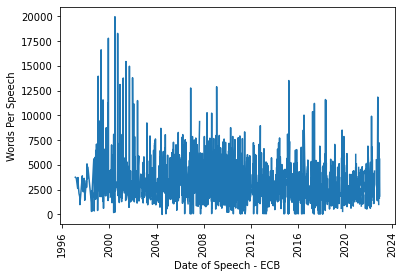

In [37]:
df = df.sort_values('date', ascending=True)
plt.plot(df['date'], df['lengthofspeech'])
plt.xticks(rotation='vertical')
plt.xlabel("Date of Speech - ECB")
plt.ylabel("Words Per Speech")

In [52]:
occur = df.groupby('speakers').count()
display(occur)

,date,title,subtitle,contents,lengthofspeech
speakers,,,,,
Alexandre Lamfalussy,7,7,7,7,7
Benoît Cœuré,191,191,191,190,190
Christian Noyer,51,51,51,51,51
Christine Lagarde,70,70,70,70,70
Eugenio Domingo Solans,76,76,76,76,76
Fabio Panetta,53,53,53,51,51
Frank Elderson,22,22,22,22,22
Gertrude Tumpel-Gugerell,159,159,159,158,158
Isabel Schnabel,62,62,62,45,45


In [65]:
# Drop missing values
df=df.dropna()

In [66]:
df.groupby('speakers').mean()

,lengthofspeech
speakers,
Alexandre Lamfalussy,2923.857143
Benoît Cœuré,3035.163158
Christian Noyer,3204.823529
Christine Lagarde,2097.585714
Eugenio Domingo Solans,3023.263158
Fabio Panetta,3467.450980
Frank Elderson,2160.727273
Gertrude Tumpel-Gugerell,2565.563291
Isabel Schnabel,3921.866667


### NLP - Sentiment Analysis

In [63]:
### import Dictionary that has words flagged positive and negative, with other strange definitions?

df_dict = pd.read_csv(r'C:\Users\wm934\Downloads\Labdocs\Loughran-McDonald_MasterDictionary_1993-2021.csv')
df_dict.tail()

,Word,Seq_num,Word Count,Word Proportion,Average Proportion,Std Dev,Doc Count,Negative,Positive,Uncertainty,Litigious,Strong_Modal,Weak_Modal,Constraining,Syllables,Source
86526,ZYGOTE,86529,50,2.189379e-09,8.729336e-10,1.886011e-07,35,0,0,0,0,0,0,0,2,12of12inf
86527,ZYGOTES,86530,1,4.378757e-11,1.809516e-11,1.932446e-08,1,0,0,0,0,0,0,0,2,12of12inf
86528,ZYGOTIC,86531,0,0.000000e+00,0.000000e+00,0.000000e+00,0,0,0,0,0,0,0,0,3,12of12inf
86529,ZYMURGIES,86532,0,0.000000e+00,0.000000e+00,0.000000e+00,0,0,0,0,0,0,0,0,3,12of12inf
86530,ZYMURGY,86533,0,0.000000e+00,0.000000e+00,0.000000e+00,0,0,0,0,0,0,0,0,3,12of12inf


In [64]:
def text_tokenize(texttoken):
    txt = texttoken
    txt = txt.lower()
    tokens = nltk.tokenize.word_tokenize(txt)
    tokens = [t for t in tokens if len(t) > 2]
    tokens = [lemmatizer.lemmatize(t) for t in tokens]
    tokens = [t for t in tokens if t not in stopwords]
    return tokens

def token_trigram(fomctext): 
    tritokens = text_tokenize(fomctext)
    trigrams = {}    
    for i in range(len(tritokens) - 2):
        k = (tritokens[i], tritokens[i+1], tritokens[i+2])
        if k not in trigrams:
            trigrams[k] = 1
        else:
            trigrams[k] += 1
    return trigrams

In [ ]:

"""
Program to provide generic parsing for all files in a user-specified directory.
The program assumes the input files have been scrubbed,
  i.e., HTML, ASCII-encoded binary, and any other embedded document structures that are not
  intended to be analyzed have been deleted from the file.

Dependencies:
    Python:  MOD_Load_MasterDictionary_vxxxx.py
    Data:    LoughranMcDonald_MasterDictionary_XXXX.csv

The program outputs:
   1.  File name
   2.  File size (in bytes)
   3.  Number of words (based on LM_MasterDictionary
   4.  Proportion of positive words (use with care - see LM, JAR 2016)
   5.  Proportion of negative words
   6.  Proportion of uncertainty words
   7.  Proportion of litigious words
   8.  Proportion of modal-strong words
   9.  Proportion of modal-weak words
  10.  Proportion of constraining words (see Bodnaruk, Loughran and McDonald, JFQA 2015)
  11.  Number of alphanumeric characters (a-z, A-Z)
  12.  Number of digits (0-9)
  13.  Number of numbers (collections of digits)
  14.  Average number of syllables
  15.  Average word length
  16.  Vocabulary (see Loughran-McDonald, JF, 2015)

  ND-SRAF
  McDonald 201606 : updated 201803; 202107; 202201
"""

import csv
import glob
import re
import string
import sys
import datetime as dt
import MOD_Load_MasterDictionary_v2021 as LM

# User defined directory for files to be parsed
TARGET_FILES = df
# User defined file pointer to LM dictionary
MASTER_DICTIONARY_FILE = df_dict
# User defined output file
OUTPUT_FILE = df_out
# Setup output
OUTPUT_FIELDS = ['file name', 'file size', 'number of words', '% negative', '% positive',
                 '% uncertainty', '% litigious', '% strong modal', '% weak modal',
                 '% constraining', '# of alphabetic', '# of digits',
                 '# of numbers', 'avg # of syllables per word', 'average word length', 'vocabulary']

lm_dictionary = LM.load_masterdictionary(MASTER_DICTIONARY_FILE, print_flag=True)


def main():

    f_out = open(OUTPUT_FILE, 'w')
    wr = csv.writer(f_out, lineterminator='\n')
    wr.writerow(OUTPUT_FIELDS)

    file_list = glob.glob(TARGET_FILES)
    n_files = 0
    for file in file_list:
        n_files += 1
        print(f'{n_files:,} : {file}')
        with open(file, 'r', encoding='UTF-8', errors='ignore') as f_in:
            doc = f_in.read()
        doc = re.sub('(May|MAY)', ' ', doc)  # drop all May month references
        doc = doc.upper()  # for this parse caps aren't informative so shift

        output_data = get_data(doc)
        output_data[0] = file
        output_data[1] = len(doc)
        wr.writerow(output_data)
        if n_files == 3: break


def get_data(doc):

    vdictionary = dict()
    _odata = [0] * 16
    total_syllables = 0
    word_length = 0
    
    tokens = re.findall('\w+', doc)  # Note that \w+ splits hyphenated words
    for token in tokens:
        if not token.isdigit() and len(token) > 1 and token in lm_dictionary:
            _odata[2] += 1  # word count
            word_length += len(token)
            if token not in vdictionary:
                vdictionary[token] = 1
            if lm_dictionary[token].negative: _odata[3] += 1
            if lm_dictionary[token].positive: _odata[4] += 1
            if lm_dictionary[token].uncertainty: _odata[5] += 1
            if lm_dictionary[token].litigious: _odata[6] += 1
            if lm_dictionary[token].strong_modal: _odata[7] += 1
            if lm_dictionary[token].weak_modal: _odata[8] += 1
            if lm_dictionary[token].constraining: _odata[9] += 1
            total_syllables += lm_dictionary[token].syllables

    _odata[10] = len(re.findall('[A-Z]', doc))
    _odata[11] = len(re.findall('[0-9]', doc))
    # drop punctuation within numbers for number count
    doc = re.sub('(?!=[0-9])(\.|,)(?=[0-9])', '', doc)
    doc = doc.translate(str.maketrans(string.punctuation, " " * len(string.punctuation)))
    _odata[12] = len(re.findall(r'\b[-+\(]?[$€£]?[-+(]?\d+\)?\b', doc))
    _odata[13] = total_syllables / _odata[2]
    _odata[14] = word_length / _odata[2]
    _odata[15] = len(vdictionary)
    
    # Convert counts to %
    for i in range(3, 9 + 1):
        _odata[i] = (_odata[i] / _odata[2]) * 100
    # Vocabulary
        
    return _odata


if __name__ == '__main__':
    start = dt.datetime.now()
    print(f'\n\n{start.strftime("%c")}\nPROGRAM NAME: {sys.argv[0]}\n')
    main()
    print(f'\n\nRuntime: {(dt.datetime.now()-start)}')
    print(f'\nNormal termination.\n{dt.datetime.now().strftime("%c")}\n')
Generic_Parser.py
Viser Generic_Parser.py.